In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
class Bandit:
    
    # self.actual_m: the true mean of the bandit system
    # self.empirical_m: the mean calculated from the experiments
    # self.N: number of experiments done so far
    
    def __init__(self, actual_m):
        self.actual_m = actual_m
        self.empirical_m = 0
        self.N = 0
    
    # generate the money returned by using the actual mean. Then update the empirical mean using the actual mean.
    def pull(self):
        money_returned = self.actual_m + np.random.randn()
        self.N += 1
        self.empirical_m = (1.0/self.N)*((self.N-1.0)*self.empirical_m + money_returned)
        return money_returned
    

In [70]:
def experiment(m, e, N):
    
    # m: true mean of bandit 1, 2 and 3
    # e: epsilon, the probability of exploration
    # N: total number of tires
    
    # assume 3-armed bandit
    bandits = [Bandit(m[0]), Bandit(m[1]), Bandit(m[2])]
    
    # value returned
    r = []
    
    # apply greedy-epsilon algo
    for i in range(N):
        
        # generate a random number
        rand = np.random.random() #returns a random value from [0.0 1.0)
        
        b_chosen = np.argmax([b.empirical_m for b in bandits]) if rand > e else np.random.randint(3)

        r_ = bandits[b_chosen].pull()
        r.append(r_)
    
    cum_r = np.cumsum(r)/(np.arange(N)+1)
    
    return cum_r
    

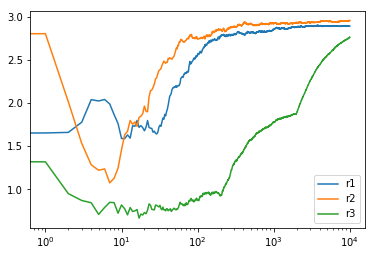

In [76]:
N = 10000
m = [1, 2, 3]

r1 = experiment(m, 0.1, N)
r2 = experiment(m, 0.05, N)
r3 = experiment(m, 0.01, N)


plt.plot(np.arange(N), r1, label='epsilon=0.1')
plt.plot(np.arange(N),r2, label='epsilon=0.1')
plt.plot(np.arange(N),r3, label='r3')
plt.legend()
plt.xscale('log')
plt.show()